# Google Colab の使い方
- このファイルは実行コード例としておいているだけですので、理解していただく必要は全くありません。
- グレーの箱ごとに実行できます（セルと言います）
  - 左側の ▶ を押すと実行されます。
- 最初は、実行すると以下の警告が出て、時間もかかりますが、「このまま実行」を押してください。
  - 『警告: このノートブックは Google が作成したものではありません。』
  - これは「勝手に誰かがつくったので危ないかもよ？Googleのせいじゃないよ？」ということです
  - ２回目以降は非常に速いです。
- 右上の 『★Gemini』を押すと、AIに何でも聞けます。
  - また、勝手にコードも書いてくれます。
  - ここで対話しながら勉強していくことができるので、誰か（人間）に教えてもらう必要はありません。
- （上部メニューの「ランタイム」→「ランタイムのタイプを変更」、から、GPUを選ぶこともできます。ただし、このファイルの計算は何もせずにCPUのままでも全く問題ないです）


In [1]:
# 計算できます。「#」以下は無視されます。
1 + 2

3

In [2]:
# 文字に値を代入できます。最後の行だけ出力が見えます。
a = 2
b = 3
a**b # これは２の３乗という意味です。

8

x = [0.  0.5 1.  1.5 2.  2.5]
y = [ 3.   3.5  5.   7.5 11.  15.5]


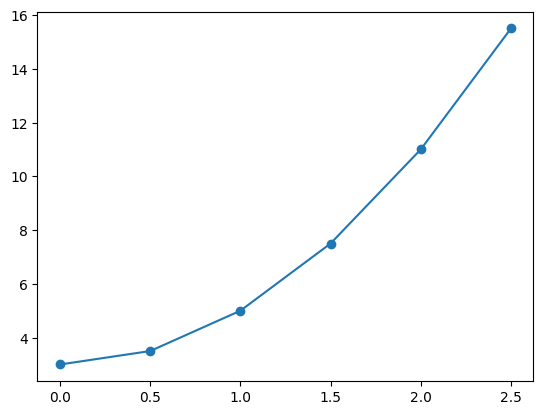

In [3]:
# とりあえず ライブラリ を読み込んで、グラフでも書いてみましょう。

# 便利な関数たちを呼び出して使えます（以下は召喚する呪文みたいなやつです）。「as xxx」のようにして名前を短く省略できます。
import numpy as np # 数値計算用（Numerical Pythonの略）
import matplotlib.pyplot as plt  # グラフプロット用

x = np.arange(0, 3, 0.5) #0から3まで0.1刻み。3は含まれないことに注意。
y = a * (x**2) + b  # いわゆる2次関数
plt.plot( x, y , 'o-' )
print('x =', x)  # printをつけると最後の行じゃなくても出力します。
print('y =', y)  # printをつけると最後の行じゃなくても出力します。


# いきなりですが、深層学習を作って、手書き文字を認識してみましょう
- 先に TensorFlow ライブラリ を使ってやってみますが、下記に同じことを Pytorch でもやります。
- なお正確には、これらはライブラリではなくフレームワークと呼びますが、細かい話なので無視してください。


In [4]:
# とりあえず、TensorFlowを呼び出して、手書き文字のライブラリをダウンロードしてみます。
import tensorflow as tf

# 手書き文字の MNIST データセットをダウンロードして、X_train, y_train, X_test, y_test に入れておく。
# X_train：学習用（トレーニング用）の画像セット。６万枚。
# y_train：学習用セットの答え。６万個の数字（0～9）
# X_test：試験用（学習に使わない）の画像セット。１万枚。
# y_test：試験用セットの答え。１万個の数字（0～9）

mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 入力正規化（0～255の値だった画像データを、0～1の値にする）
X_train = X_train.astype('float32')/255.0
X_test  = X_test.astype('float32')/255.0

print("X_train には、6万個の 28ピクセルx28ピクセル の画像が入った： ", X_train.shape)
print("y_train には、6万個の 答え が入った： ", y_train.shape)
print("X_test には、1万個の 28ピクセルx28ピクセル の画像が入った： ", X_train.shape)
print("y_test には、1万個の 答え が入った： ", y_test.shape)


X_train には、6万個の 28ピクセルx28ピクセル の画像が入った：  (60000, 28, 28)
y_train には、6万個の 答え が入った：  (60000,)
X_test には、1万個の 28ピクセルx28ピクセル の画像が入った：  (60000, 28, 28)
y_test には、1万個の 答え が入った：  (10000,)


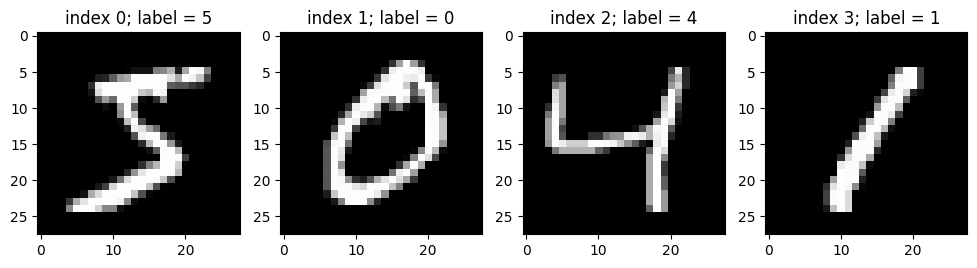

In [5]:
# ちょっと絵を見てみる

plt.figure(figsize=(12,3)) # 全体の画像サイズを定義しているだけ
for i in range(4): # 以下を、iが0,1,2,3として、４回繰り返す、という呪文
    plt.subplot(1,4,i+1) # 1行4列のうち、i+1番目に絵画する
    plt.imshow(X_train[i], cmap='gray') # 画像(image)を見せる(show)関数
    plt.title(f"index {i}; label = {y_train[i]}") # 各画像の上に文字をつける


In [6]:
# DNN（深層学習モデル）を作る
# 最も簡単な、入力層、隠れ層、出力層、の３層。

model = tf.keras.models.Sequential([
    # (None, 28, 28) -> (None, 784)
    tf.keras.layers.Flatten(input_shape=(28, 28), name='input'),

    # Layer1: Linear mapping: (None, 784) -> (None, 256)
    tf.keras.layers.Dense(256, name='784->256'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu'),

    # Layer2: Linear mapping: (None, 256) -> (None, 10)
    tf.keras.layers.Dense(10, name='256->10'),
    # Activation function: Softmax
    tf.keras.layers.Activation(tf.nn.softmax, name='softmax')
])

# モデル構造を表示
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 784->256 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 256->10 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 学習する

# 最適化アルゴリズム、評価の基準、評価の指標などを指定する
# なお、adamなど、ここで選んだものは標準的で、性能も安定しており、原理もわかりやすく、実装も簡単で、実際にも広く使われるものです。
# 状況によっては別のものが良い場合もありますが、詳しくなってから考えると良いと思います。
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 学習（Training）
history = model.fit(         # 学習を実行し、学習過程の履歴（loss, accuracy など）を history に保存
    X_train, y_train,        # 学習用データと正解ラベル
    batch_size=100,          # 一度に学習するデータ数（バッチサイズ）
    epochs=5,                # 学習データを繰り返し使う回数（エポック数）
    verbose=1,               # 学習の進行状況を表示（0=非表示, 1=プログレスバー, 2=エポックごとの簡易表示）
    validation_data=(X_test, y_test)  # 検証用データと正解ラベル（学習中に過学習をチェック）
)

# モデルの評価(evaluation)

# テストデータ、つまりトレーニング中には一度も見たことないデータで評価（といっても上記の最後のval accuracyと同じ）
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("accuracy:", round( test_acc*100, 2), '%')


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8631 - loss: 0.4903 - val_accuracy: 0.9555 - val_loss: 0.1512
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9621 - loss: 0.1306 - val_accuracy: 0.9657 - val_loss: 0.1132
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9750 - loss: 0.0862 - val_accuracy: 0.9744 - val_loss: 0.0856
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9812 - loss: 0.0626 - val_accuracy: 0.9764 - val_loss: 0.0771
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9864 - loss: 0.0467 - val_accuracy: 0.9768 - val_loss: 0.0690
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0816
accuracy: 97.68 %


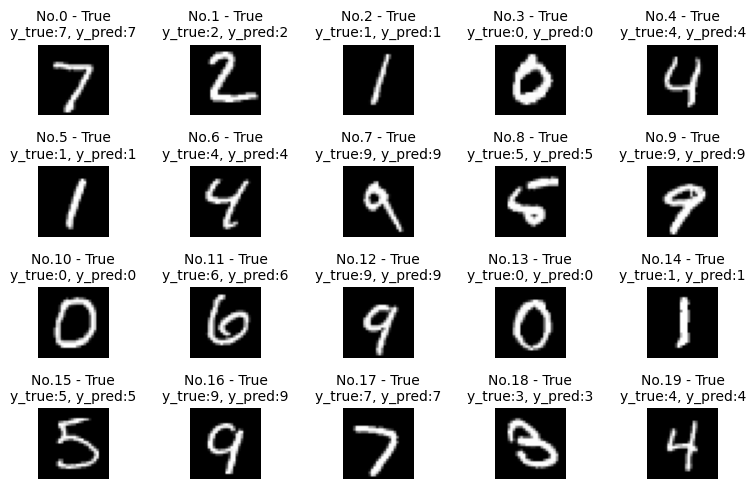

In [8]:

# 学習したモデルがちゃんと答えているかの確認

fig = plt.figure(figsize=(8, 5))

ROW = 4
COLUMN = 5

for i in range(ROW * COLUMN):
    y_true = y_test[i]
    y_pred = model.predict(X_test[i].reshape(1,28,28), verbose=0)[0].argmax()

    if y_true == y_pred:
        result = "True" # Correct answer from the model
    else:
        result = "False" # Incorrect answer from the model

    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("No.{} - {}\ny_true:{}, y_pred:{}".format(i, result, y_true, y_pred), fontsize=10)
    plt.axis("off")

fig.tight_layout()
fig.show()


In [9]:
# 例えば、以下のように、階層を増やすことも簡単にできる。
# でもタスクが簡単なので別に良くはならない。（すでに98%だし）

# モデルの作成
model = tf.keras.models.Sequential([
    # (None, 28, 28) -> (None, 784)
    tf.keras.layers.Flatten(input_shape=(28, 28), name='input'),

    # Layer1: Linear mapping: (None, 784) -> (None, 512)
    tf.keras.layers.Dense(512, name='fc_1'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu_1'),

    # Layer2: Linear mapping: (None, 512) -> (None, 256)
    tf.keras.layers.Dense(256, name='fc_2'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu_2'),

    # Layer3: Linear mapping: (None, 256) -> (None, 256)
    tf.keras.layers.Dense(256, name='fc_3'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu_3'),

    # Layer4: Linear mapping: (None, 256) -> (None, 10)
    tf.keras.layers.Dense(10, name='dense_3'),
    # Activation function: Softmax
    tf.keras.layers.Activation(tf.nn.softmax, name='softmax')
])

# モデル構造を表示
model.summary()

# コンパイル
# 最適化アルゴリズム、評価の基準、評価の指標などを指定する
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 学習（Training）
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

# モデルの評価(evaluation)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("accuracy:", round( test_acc*100, 2), '%')




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1 (Activation)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_3 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,610 (2.29 MB)

 Trainable params: 601,610 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8846 - loss: 0.4025 - val_accuracy: 0.9663 - val_loss: 0.1076
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9750 - loss: 0.0834 - val_accuracy: 0.9770 - val_loss: 0.0785
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9827 - loss: 0.0559 - val_accuracy: 0.9785 - val_loss: 0.0787
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9867 - loss: 0.0407 - val_accuracy: 0.9784 - val_loss: 0.0735
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.9769 - val_loss: 0.0781
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9727 - loss: 0.0894
accuracy: 97.69 %


In [10]:
# 同じことを、Pytorchでやってみる（MNISTの取得から、深層学習モデル構築、評価まで、一つのセルにつっこんだ）

# まずは呼び出し
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# データ（28x28 のグレースケールを [0,1] に正規化）
tr = transforms.ToTensor()
train_ds = datasets.MNIST(root='.', train=True,  download=True, transform=tr)
test_ds  = datasets.MNIST(root='.', train=False, download=True, transform=tr)
train_dl = DataLoader(train_ds, batch_size=100, shuffle=True)
test_dl  = DataLoader(test_ds,  batch_size=100)

# モデル（Flatten → 784→256→ReLU→256→10）
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 10)          # CrossEntropyLoss を使うので出力は logits（Softmax不要）
).to(device)

# モデル表示
print("Model")
print(model)

# 学習
crit = nn.CrossEntropyLoss()
opt  = optim.Adam(model.parameters())
for epoch in range(5):
    model.train()
    for x, y in tqdm(train_dl, desc=f"Epoch {epoch+1}"):
        x, y = x.to(device), y.to(device)
        opt.zero_grad()
        loss = crit(model(x), y)
        loss.backward()
        opt.step()

# 評価
model.eval()
correct = total = 0
with torch.no_grad():
    for x, y in test_dl:
        x, y = x.to(device), y.to(device)
        pred = model(x).argmax(1)
        correct += (pred == y).sum().item()
        total   += y.size(0)
print('accuracy:', round(100*correct/total, 2), '%')


Model
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


Epoch 5: 100%|██████████| 600/600 [00:11<00:00, 53.54it/s]


accuracy: 97.79 %


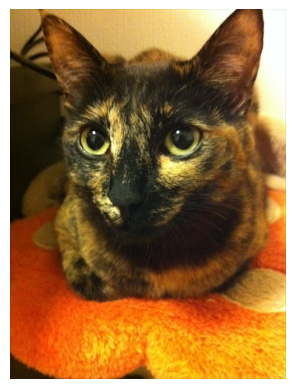

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Egyptian_cat         : score = 0.492
Siamese_cat          : score = 0.207
tabby                : score = 0.071
tiger_cat            : score = 0.026
lynx                 : score = 0.019


In [11]:
# 実際には、自分で深層学習モデルを作るというよりは、既にあるものを使う方が多いと思います。例えば。
import tensorflow as tf
import requests

# 学習済みの深層学習モデルをダウンロード
model = tf.keras.applications.efficientnet.EfficientNetB0()

# ネットにある適当な画像を読み込み
img_path = tf.keras.utils.get_file(origin="https://raw.githubusercontent.com/hosodakazufumi/note/main/data/IMG_2604_R.jpg")
x = tf.keras.utils.load_img(img_path, color_mode="rgb")
x = tf.keras.utils.img_to_array(x)  # float32, 0..255

# 画像表示
plt.imshow(x.astype(np.uint8)); plt.axis("off"); plt.show()

# 画像の前処理
x = tf.image.resize(x, model.input_shape[1:3])  # [H,W,3], float32
x = tf.keras.applications.efficientnet.preprocess_input(x)  # モデルに合わせたスケーリング
x = tf.expand_dims(x, 0)  # [1,H,W,3]

# 推論
y = model.predict(x)[0]  # 1バッチ分の出力
from tensorflow.keras.applications.efficientnet import decode_predictions
for cls, name, score in decode_predictions(y[None, ...], top=5)[0]:
    print(f"{name:20s} : score = {score:.3f}")




In [12]:
# EfficientNetB0 は EfficientNet の中でも最も小さいが、それでもかなり層が深い
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='efficientnetb0.png', show_shapes=True, show_layer_names=True, dpi=80)
plot_model(model, to_file='efficientnetb0.png', show_shapes=False, show_layer_names=False, dpi=3)

# 次にANNではない教師なし学習や教師あり学習をやってみます。
- 科学技術用のライブラリである scipy と、より機械学習に特化したライブラリである scikit-learn（sklearn）を用います

In [13]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [14]:
# 適当なデータファイルを読み込みます。

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/data_sample.csv'
df = pd.read_csv(url)

df


,ID,Name,class,Body Weight (kg),Height (cm),BMI,Body Fat Percentage (%),Waist Circumference (cm),Hip Circumference (cm),Waist-to-Hip Ratio,...,Heart Rate (bpm),Blood Glucose Level (mg/dL),Total Cholesterol (mg/dL),LDL Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Triglycerides (mg/dL),HbA1c (%),Blood Oxygen Saturation (%),Bone Density (g/cmﾂｲ),Basal Metabolic Rate (kcal/day)
0,1000,Alice,0,57.610417,175.996393,18.786507,24.866068,108.211731,83.574593,0.721329,...,66.191575,112.824540,215.250140,103.254978,46.751628,139.656073,4.181929,96.582100,1.041283,1789.747987
1,1001,Bob,1,69.885877,181.290770,20.659982,11.797085,73.526117,112.837857,0.869728,...,77.142878,85.882222,197.372971,122.192574,72.726636,56.021648,6.807114,99.847498,1.023918,1204.882507
2,1002,Charlie,2,99.239703,189.132896,22.559459,34.608242,95.834333,108.334789,0.810786,...,68.250208,137.355543,212.125645,81.184689,56.372695,133.846574,5.063768,95.031543,0.896397,2249.464133
3,1003,David,0,89.827506,187.644023,21.759206,10.665353,117.146546,123.529229,0.759572,...,65.136431,104.099207,228.134157,116.683626,47.937475,81.475541,5.435611,96.893492,0.821594,1254.786881
4,1004,Eva,1,54.295298,156.459600,25.305027,16.951926,104.951442,85.463941,0.727878,...,93.646964,76.218348,219.549203,91.711426,59.404974,86.161107,6.258412,97.665159,0.824162,1933.767292
5,1005,Frank,2,70.592433,154.159988,28.616694,24.071701,80.891488,118.165903,0.934419,...,65.590661,127.733143,196.590260,108.002159,70.961852,174.221729,6.040106,97.610391,0.868287,2358.784874
6,1006,Grace,0,53.866029,150.151290,27.289212,29.196798,75.457995,116.408781,0.790541,...,93.891095,123.708985,233.083373,142.972305,75.208700,148.214885,5.794434,99.566950,1.142120,1427.113738
7,1007,Hannah,1,83.926989,159.001325,19.778940,19.948289,84.752505,82.252866,0.721786,...,75.387045,73.997707,204.303376,139.229522,79.359758,114.691210,6.481544,99.094307,1.007077,1824.580793
8,1008,Ivy,2,57.144487,162.813941,23.131414,27.882388,92.763740,94.648403,0.921035,...,62.431572,140.351760,225.863839,102.704837,46.137607,129.440779,6.900101,96.894284,0.886615,2377.191047
9,1009,John,0,86.353718,184.514874,18.759845,34.517226,91.059666,127.399558,0.782365,...,82.009947,106.876686,167.740840,139.023225,62.566718,191.187029,6.743837,96.840431,0.921096,1639.233332


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


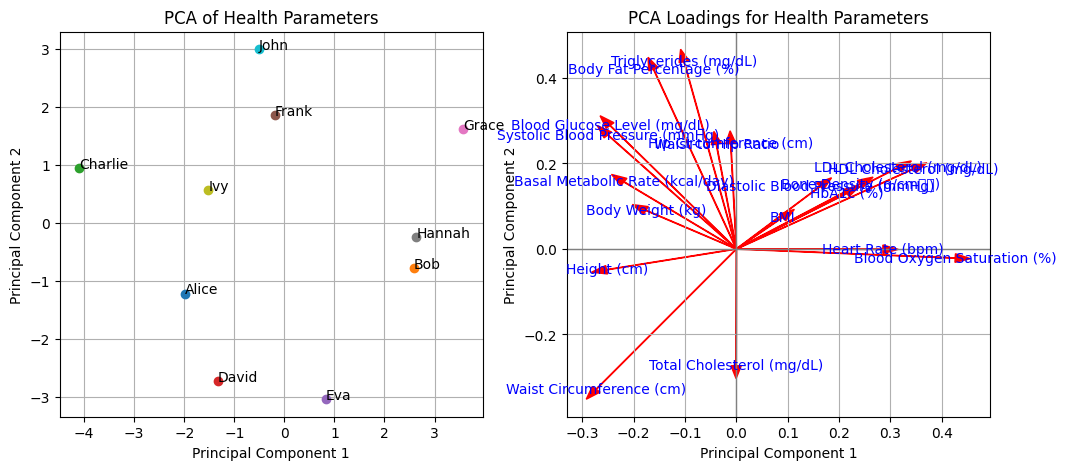

In [15]:
# 教師なし、次元削減（主成分分析: PCA = Principal Component Analysis）

# データ部分だけとってきて、numpyにします。
xname = df['Name'].values
xparams = df.columns[3:].values
x = df.iloc[:,3:].values.copy()
x_normalized = StandardScaler().fit_transform(x)    # 特徴ごとに平均0・分散1へ標準化

# PCA実行
pca = PCA(n_components=4)
xpc = pca.fit_transform(x_normalized)

# グラフを書く
plt.figure(figsize=(12,5))
plt.subplot(121)
for i in range(x.shape[0]):
  plt.plot(xpc[i,0], xpc[i,1],'o')
  plt.text(xpc[i,0], xpc[i,1], xname[i])

plt.title('PCA of Health Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


# 各パラメタの寄与を表示
kiyo = pca.components_.T

plt.subplot(122)
for i in range(len(xparams)):
    plt.arrow(0, 0, kiyo[i, 0], kiyo[i, 1], color='r', head_width=0.02)
    plt.text(kiyo[i, 0], kiyo[i, 1], xparams[i], color='b', ha='center', va='center')

plt.title('PCA Loadings for Health Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()


3クラスタの割当: [3 1 3 2 2 3 1 1 3 3]


Text(0, 0.5, 'Distance')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


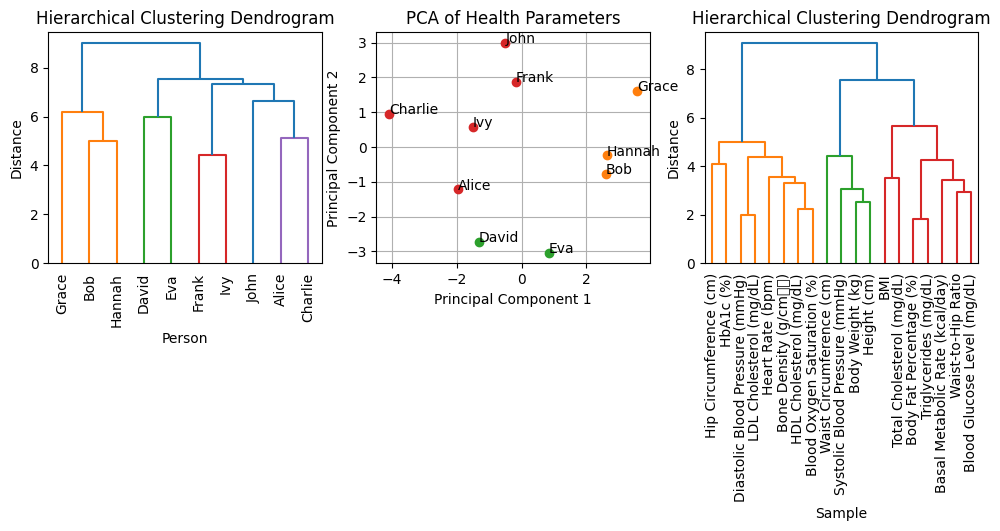

In [16]:
# 教師なし、分類（階層クラスタリング）

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# データ部分だけとってきて、numpyにします。
xname = df['Name'].values
xparams = df.columns[3:].values
x = df.iloc[:,3:].values.copy()
x_normalized = StandardScaler().fit_transform(x)    # 特徴ごとに平均0・分散1へ標準化

# 階層クラスタリング（ward法）
Z = linkage(x_normalized, method='ward')
labels_k = fcluster(Z, t=3, criterion='maxclust')
print("3クラスタの割当:", labels_k)

# Plot the dendrogram
plt.figure(figsize=(12,3))
plt.subplot(131)
dendrogram(Z, labels=xname, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Person')
plt.ylabel('Distance')


# 上記のPCAで、このクラスタ分類を見てみる
cmap10 = plt.get_cmap("tab10")
plt.subplot(132)
for i in range(x.shape[0]):
  plt.plot(xpc[i,0], xpc[i,1],'o',color=cmap10(labels_k[i]) )
  plt.text(xpc[i,0], xpc[i,1], xname[i])

plt.title('PCA of Health Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


# 逆に、パラメタに対してもやってみる

# 階層クラスタリング（ward法）
Z = linkage(x_normalized.T, method='ward')

# グラフを書く
plt.subplot(133)
dendrogram(Z, labels=xparams, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')


/tmp/ipython-input-1103218285.py:44: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1103218285.py:44: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


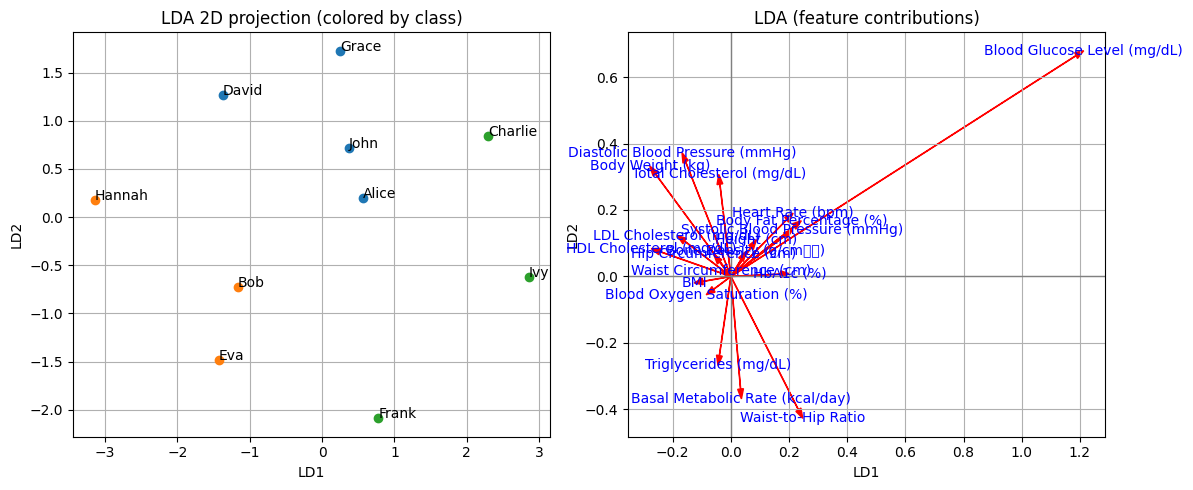

In [17]:
# 教師有、次元削減。与えられた"class"を使う（この後、新たな人のデータに対してこの次元を使うことでクラスがわかる）
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# データ部分だけとってきて、numpyにします。
xname = df['Name'].values
xparams = df.columns[3:].values
x = df.iloc[:,3:].values.copy()
x_normalized = StandardScaler().fit_transform(x)    # 特徴ごとに平均0・分散1へ標準化
y = df["class"].values
y = [0,1,2,0,1,2,0,1,2,0]


# 標準化 → LDA(2次元)
lda = LDA(n_components=2)
xlda = lda.fit_transform(x_normalized, y)  # shape: (n_samples, 2)

# 2Dプロット（classで色分け、各点に名前を注記）
cmap10 = plt.get_cmap("tab10")
plt.figure(figsize=(12,5))
plt.subplot(121)
for i in range(x.shape[0]):
  plt.plot(xlda[i,0], xlda[i,1],'o',color=cmap10(y[i]) )
  plt.text(xlda[i,0], xlda[i,1], xname[i])

plt.title("LDA 2D projection (colored by class)")
plt.xlabel("LD1"); plt.ylabel("LD2")
plt.grid(True)
plt.tight_layout()


# 特徴量の寄与ベクトル（scalings_ を利用）
plt.subplot(122)
loadings = lda.scalings_[:, :2]  # 各特徴の係数 (n_features × 2)
for i, feat in enumerate(xparams):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1],
              color='r', head_width=0.02, length_includes_head=True)
    plt.text(loadings[i,0], loadings[i,1], feat,
             color='b', ha='center', va='center')
plt.axhline(0, color='grey', lw=1); plt.axvline(0, color='grey', lw=1)
plt.title("LDA (feature contributions)")
plt.xlabel("LD1"); plt.ylabel("LD2"); plt.grid(True)
plt.tight_layout()
plt.show()



# 次に、データを統計解析してみます
- 科学技術用のライブラリである scipy、統計モデリング用の statsmodels、さらにscipyやstatsmodelsではカバーしていない多重検定などを提供する scikit_posthocs を用います

In [18]:
# import
import pandas as pd
import seaborn as sns
import scipy # pip install scipy
import statsmodels # pip install statsmodels
import scikit_posthocs # pip install scikit-posthocs

In [19]:

# データファイルを読み込みます。まずはMatrix形式のデータです。
# 細かいことはおいといて、各時間に、７人の人の血圧と、その時の室温のデータが入っているとします。

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/data_matrix.csv'
xmat = pd.read_csv(url)
xname = xmat.columns[1:].values

xmat

,time,Alice,Bob,Charlie,David,Eva,Frank,Grace,room_temp
0,0,66.260000,86.990000,80.570000,66.230000,87.380000,65.600000,74.930000,20.300000
1,2,64.037952,88.125488,78.643391,67.020812,89.267530,68.492891,71.185896,21.367760
2,4,66.084142,87.936356,80.123808,66.202297,88.100383,66.353962,72.416365,22.102321
3,6,70.389389,85.844614,83.687399,64.589934,84.594516,61.192709,76.588876,22.291663
4,8,74.460032,83.683739,86.309413,63.556247,81.359299,56.302790,80.308437,21.786020
...,...,...,...,...,...,...,...,...,...
95,190,68.862341,88.072094,80.875399,66.835952,87.364838,65.658903,68.537143,29.528122
96,192,64.709356,89.750637,77.580278,68.349284,90.837557,70.125525,64.509043,29.569105
97,194,61.316202,91.385161,74.313203,69.336714,93.971811,74.543048,59.998562,29.932500
98,196,59.330314,92.690517,72.370003,69.766914,95.912817,76.909765,57.742184,30.148723


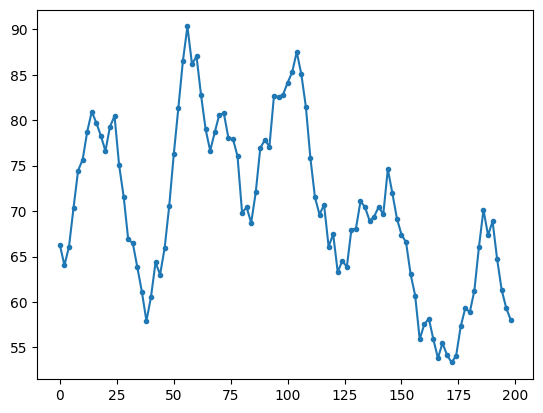

In [20]:

# 一人分+室温、Plotしてみましょう
x = xmat['time']
y = xmat['Alice']
plt.plot( x, y, '.-' )


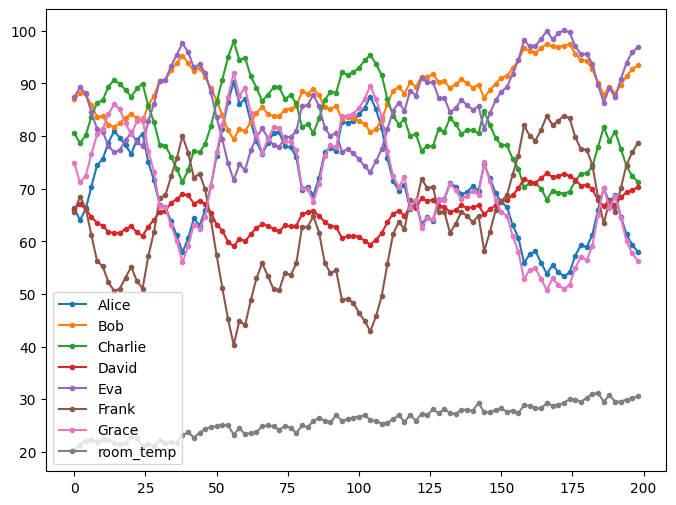

In [21]:

# 全てのデータをPlotしてみます。

fig = plt.figure( figsize=(8,6) )
x = xmat.iloc[:,0]
for i in np.arange( 1, len(xmat.columns) ):
    y = xmat.iloc[:,i]
    plt.plot( x, y, '.-' , label=xmat.columns[i])
plt.legend()


(100, 7)


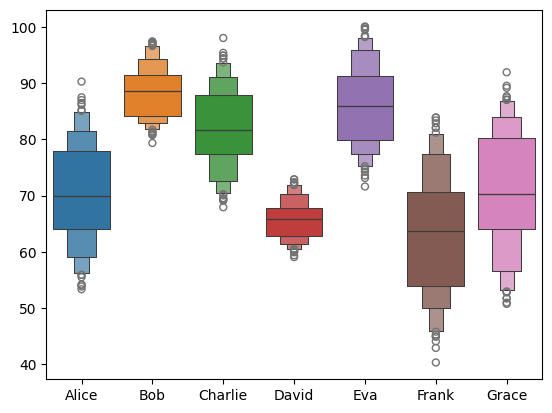

In [22]:
# 仮に時系列を忘れたとして、各人の違いを見てみます
x = xmat.iloc[:,1:-1]
sns.boxenplot( data=x )
print(x.shape)


In [23]:
# 最初に、基本である２群の検定をやってみます。割と似ている二人で
A = xmat['Bob'].values
B = xmat['Eva'].values

# WelchのT検定（正規分布を仮定。一応、論文でも使えます）
print('Welch t: P =', scipy.stats.ttest_ind(A, B, equal_var=False).pvalue.round(3) )

# StudentのT検定（正規分布かつ分散が等しいと仮定※基本的につかわない。データ数が非常に少ない時ぐらい？）
print('Student t: P =', scipy.stats.ttest_ind(A, B, equal_var=True).pvalue.round(3) )

# 各日での差を検定する場合(paired-t-test)
print('Paired t: P =', scipy.stats.ttest_rel(A, B).pvalue.round(3) )

# ノンパラメトリック検定(分布はなんでもかまわない。大小の順序に変えてから実施)
print('Mannwhitneyu: P =', scipy.stats.mannwhitneyu(A, B).pvalue.round(3) )

# 各日での差をノンパラメトリック検定する場合
print('Wilcoxon: P =', scipy.stats.wilcoxon(A, B).pvalue.round(3) )


Welch t: P = 0.009
Student t: P = 0.009
Paired t: P = 0.0
Mannwhitneyu: P = 0.013
Wilcoxon: P = 0.0


In [24]:
# 実際には、全通りの組み合わせを解析すると思います。

# 以下、 statsmodels を使用するために、データをLong形式（query形式）に変換します。
x = xmat.iloc[:,1:-1]
xq = x.melt(var_name='name', value_name='value')
xq

,name,value
0,Alice,66.260000
1,Alice,64.037952
2,Alice,66.084142
3,Alice,70.389389
4,Alice,74.460032
...,...,...
695,Grace,68.537143
696,Grace,64.509043
697,Grace,59.998562
698,Grace,57.742184


In [25]:
# tukeyhsd  ※これは論文でも使われます（ただし等分散を仮定しています）
from statsmodels.stats.multicomp import pairwise_tukeyhsd

z = pairwise_tukeyhsd(xq['value'], xq['name'], alpha=0.05)
print(z)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
  Alice     Bob  17.9588    0.0  14.5371  21.3805   True
  Alice Charlie  11.5979    0.0   8.1762  15.0196   True
  Alice   David  -4.8868 0.0005  -8.3085  -1.4652   True
  Alice     Eva  15.6391    0.0  12.2174  19.0607   True
  Alice   Frank  -7.3373    0.0  -10.759  -3.9156   True
  Alice   Grace   0.4313 0.9998  -2.9903    3.853  False
    Bob Charlie  -6.3609    0.0  -9.7826  -2.9392   True
    Bob   David -22.8456    0.0 -26.2673  -19.424   True
    Bob     Eva  -2.3198 0.4125  -5.7414   1.1019  False
    Bob   Frank -25.2961    0.0 -28.7178 -21.8744   True
    Bob   Grace -17.5275    0.0 -20.9492 -14.1058   True
Charlie   David -16.4847    0.0 -19.9064 -13.0631   True
Charlie     Eva   4.0411 0.0092   0.6195   7.4628   True
Charlie   Frank -18.9352    0.0 -22.3569 -15.5135   True
Charlie   Grace -11.1666    0.0

In [26]:

# Steel-Dwass-Critchlow-Fligner
# ※これはノンパラメトリックなので等分散どころか正規分布も仮定していない。
# つまり、どんな分布の場合にも適用できるけど、最も厳しい
z = scikit_posthocs.posthoc_dscf(xq, val_col='value', group_col='name')
print( 'alpha = 5%' )
print( z < 0.05 )
print( 'alpha = 1%' )
print( z < 0.01 )


alpha = 5%
         Alice    Bob  Charlie  David    Eva  Frank  Grace
Alice    False   True     True   True   True   True  False
Bob       True  False     True   True  False   True   True
Charlie   True   True    False   True   True   True   True
David     True   True     True  False   True  False   True
Eva       True  False     True   True  False   True   True
Frank     True   True     True  False   True  False   True
Grace    False   True     True   True   True   True  False
alpha = 1%
         Alice    Bob  Charlie  David    Eva  Frank  Grace
Alice    False   True     True   True   True   True  False
Bob       True  False     True   True  False   True   True
Charlie   True   True    False   True  False   True   True
David     True   True     True  False   True  False   True
Eva       True  False    False   True  False   True   True
Frank     True   True     True  False   True  False   True
Grace    False   True     True   True   True   True  False
